## Importing libraries

In [1391]:
import pandas as pd

In [1392]:
!pip install matplotlib-venn

Reading csv file 

In [1393]:
data=pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')

In [1394]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


checking the shape of the data

In [1395]:
data.shape

(2111, 17)

checking the info of the dataset

In [1396]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

Displaying the top 5 elements in the dataset

In [1397]:
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [1398]:
data.columns=['Age', 'Gender', 'Height', 'Weight', 'Alco_Cons', 'High_Cal_Intake', 'Veggi_cons', 'count_Meals',
       'Cal_Intake', 'SMOKE', 'Water_cons', 'family_with_OverWgt', 'Exercise', 'Tech_Usage',
       'Food_b/w_Meals', 'Transport_Usage', 'Obesity_level']

In [1399]:
data.describe()

,Age,Height,Weight,Veggi_cons,count_Meals,Water_cons,Exercise,Tech_Usage
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [1400]:
data.describe(include='object')

,Gender,Alco_Cons,High_Cal_Intake,Cal_Intake,SMOKE,family_with_OverWgt,Food_b/w_Meals,Transport_Usage,Obesity_level
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,4,2,2,2,2,4,5,7
top,Male,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1401,1866,2015,2067,1726,1765,1580,351


## Checking the duplicate values

In [1401]:
data.duplicated().value_counts()

False    2087
True       24
Name: count, dtype: int64

## dropping the duplicate values

In [1402]:
data=data.drop_duplicates()

In [1403]:
data.shape

(2087, 17)

In [1404]:
data.corr  #checking the correlation of the dataset

<bound method DataFrame.corr of             Age  Gender    Height      Weight   Alco_Cons High_Cal_Intake  \
0     21.000000  Female  1.620000   64.000000          no              no   
1     21.000000  Female  1.520000   56.000000   Sometimes              no   
2     23.000000    Male  1.800000   77.000000  Frequently              no   
3     27.000000    Male  1.800000   87.000000  Frequently              no   
4     22.000000    Male  1.780000   89.800000   Sometimes              no   
...         ...     ...       ...         ...         ...             ...   
2106  20.976842  Female  1.710730  131.408528   Sometimes             yes   
2107  21.982942  Female  1.748584  133.742943   Sometimes             yes   
2108  22.524036  Female  1.752206  133.689352   Sometimes             yes   
2109  24.361936  Female  1.739450  133.346641   Sometimes             yes   
2110  23.664709  Female  1.738836  133.472641   Sometimes             yes   

      Veggi_cons  count_Meals Cal_Intake SMOKE  Water_cons  \
0            2.0          3.0         no    no    2.000000   
1            3.0          3.0        yes   yes    3.000000   
2            2.0          3.0         no    no    2.000000   
3            3.0          3.0         no    no    2.000000   
4            2.0          1.0         no    no    2.000000   
...          ...          ...        ...   ...         ...   
2106         3.0          3.0         no    no    1.728139   
2107         3.0          3.0         no    no    2.005130   
2108         3.0          3.0         no    no    2.054193   
2109         3.0          3.0         no    no    2.852339   
2110         3.0          3.0         no    no    2.863513   

     family_with_OverWgt  Exercise  Tech_Usage Food_b/w_Meals  \
0                    yes  0.000000    1.000000      Sometimes   
1                    yes  3.000000    0.000000      Sometimes   
2                    yes  2.000000    1.000000      Sometimes   
3                     no  2.000000    0.000000      Sometimes   
4                     no  0.000000    0.000000      Sometimes   
...                  ...       ...         ...            ...   
2106                 yes  1.676269    0.906247      Sometimes   
2107                 yes  1.341390    0.599270      Sometimes   
2108                 yes  1.414209    0.646288      Sometimes   
2109                 yes  1.139107    0.586035      Sometimes   
2110                 yes  1.026452    0.714137      Sometimes   

            Transport_Usage        Obesity_level  
0     Public_Transportation        Normal_Weight  
1     Public_Transportation        Normal_Weight  
2     Public_Transportation        Normal_Weight  
3                   Walking   Overweight_Level_I  
4     Public_Transportation  Overweight_Level_II  
...                     ...                  ...  
2106  Public_Transportation     Obesity_Type_III  
2107  Public_Transportation     Obesity_Type_III  
2108  Public_Transportation     Obesity_Type_III  
2109  Public_Transportation     Obesity_Type_III  
2110  Public_Transportation     Obesity_Type_III  

[2087 rows x 17 columns]>

## Data visualization

In [1405]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1406]:
num=data.select_dtypes(include='number')

<ipython-input-1407-00dc80e19c21>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],hist=False,ax=axes[i][0],color=color[i])
<ipython-input-1407-00dc80e19c21>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],hist=False,ax=axes[i][0],color=color[i])
<ipython-i

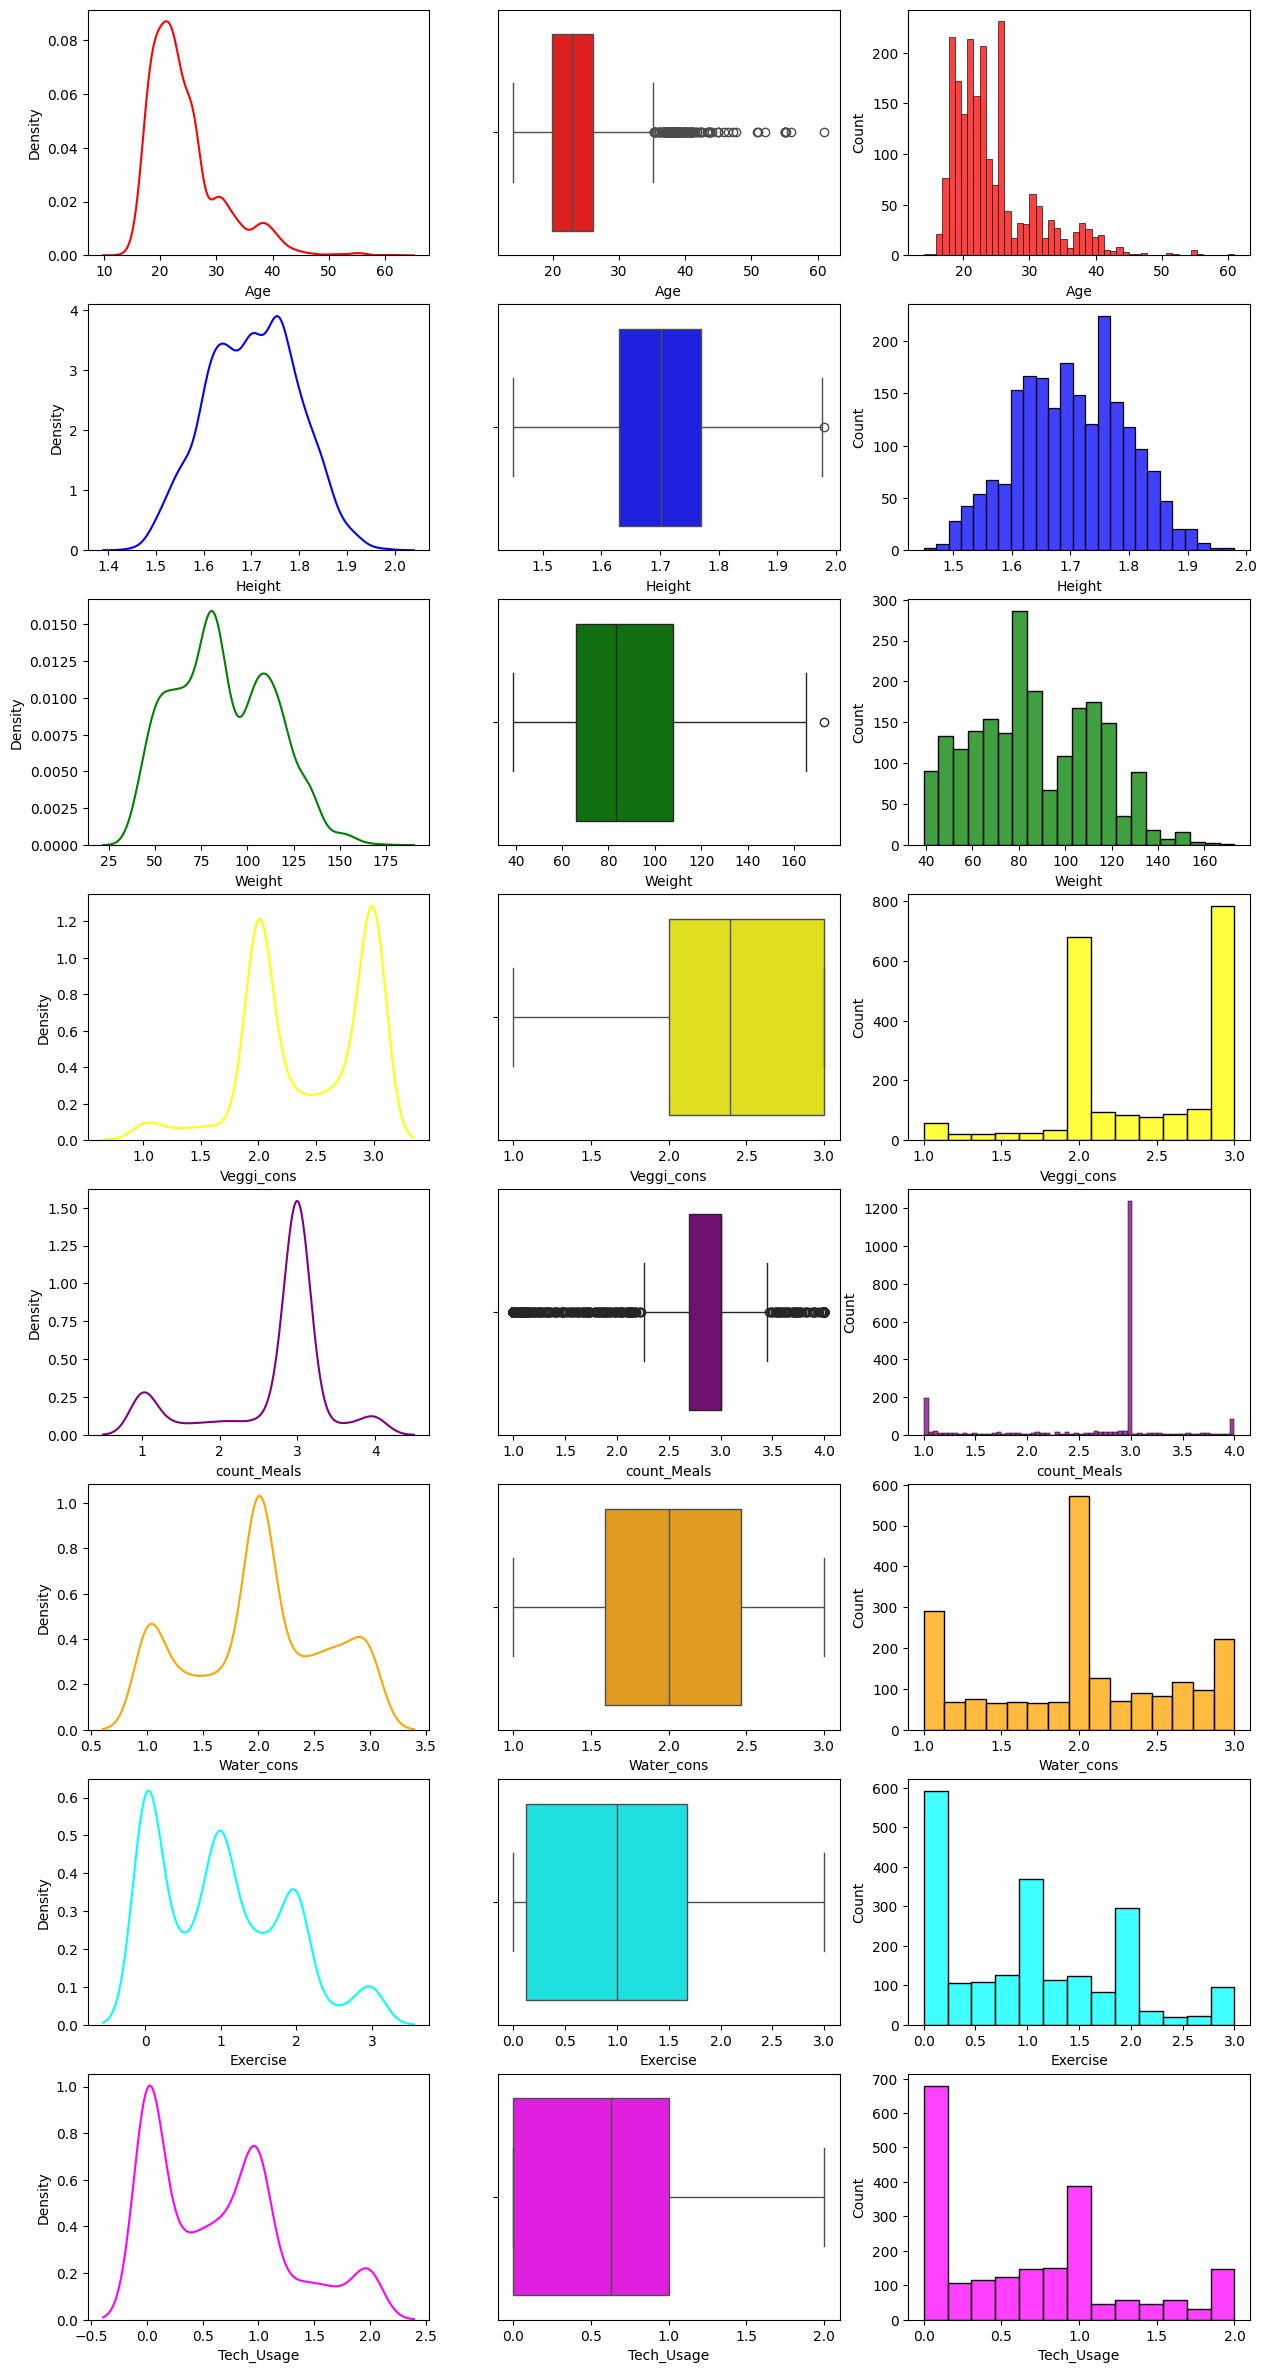

In [1407]:
figure,axes=plt.subplots(8,3,figsize=(15,30))
i=0
color=["#FF0000", "#0000FF", "#008000", "#FFFF00", "#800080", "#FFA500", "#00FFFF", "#FF00FF"]
for col in num:
    sns.distplot(data[col],hist=False,ax=axes[i][0],color=color[i])
    sns.boxplot(data[col],orient='h',ax=axes[i][1],color=color[i])
    sns.histplot(data[col],ax=axes[i][2],color=color[i])
    i=i+1

In [1409]:
cat=data.select_dtypes(include='O')

In [1410]:
cat

,Gender,Alco_Cons,High_Cal_Intake,Cal_Intake,SMOKE,family_with_OverWgt,Food_b/w_Meals,Transport_Usage,Obesity_level
0,Female,no,no,no,no,yes,Sometimes,Public_Transportation,Normal_Weight
1,Female,Sometimes,no,yes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,Frequently,no,no,no,yes,Sometimes,Public_Transportation,Normal_Weight
3,Male,Frequently,no,no,no,no,Sometimes,Walking,Overweight_Level_I
4,Male,Sometimes,no,no,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_III


## Encoding

In [1414]:
!pip install feature-engine -q

In [1415]:
import feature_engine

In [1416]:
from feature_engine.encoding  import MeanEncoder

In [1417]:
encoder=MeanEncoder(variables=['Gender','Alco_Cons','High_Cal_Intake','Cal_Intake','SMOKE','family_with_OverWgt','Food_b/w_Meals','Transport_Usage','Obesity_level'])

In [1418]:
data=encoder.fit_transform(data,data['Age'])

In [1419]:
data.head()

,Age,Gender,Height,Weight,Alco_Cons,High_Cal_Intake,Veggi_cons,count_Meals,Cal_Intake,SMOKE,Water_cons,family_with_OverWgt,Exercise,Tech_Usage,Food_b/w_Meals,Transport_Usage,Obesity_level
0,21.0,24.028008,1.62,64.0,24.157318,23.23236,2.0,3.0,24.518014,24.267813,2.0,24.940492,0.0,1.0,24.727248,22.291953,21.758865
1,21.0,24.028008,1.52,56.0,24.304320,23.23236,3.0,3.0,20.932632,28.312669,3.0,24.940492,3.0,0.0,24.727248,22.291953,21.758865
2,23.0,24.672918,1.80,77.0,27.141186,23.23236,2.0,3.0,24.518014,24.267813,2.0,24.940492,2.0,1.0,24.727248,22.291953,21.758865
3,27.0,24.672918,1.80,87.0,27.141186,23.23236,3.0,3.0,24.518014,24.267813,2.0,21.581838,2.0,0.0,24.727248,21.995900,23.540309
4,22.0,24.672918,1.78,89.8,24.304320,23.23236,2.0,1.0,24.518014,24.267813,2.0,21.581838,0.0,0.0,24.727248,22.291953,26.996981


In [1420]:
data['Obesity_level']=round(data['Obesity_level'],0)

## label encoding

In [1422]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Obesity_level'] = encoder.fit_transform(data['Obesity_level'])

In [1423]:
b=data['Obesity_level']
b

0       1
1       1
2       1
3       3
4       5
       ..
2106    2
2107    2
2108    2
2109    2
2110    2
Name: Obesity_level, Length: 2087, dtype: int64

## Scaling 

In [1424]:
from sklearn.preprocessing import StandardScaler

In [1425]:
a=StandardScaler()

In [1426]:
data=data.drop(['Obesity_level'],axis=1)

In [1427]:
data=a.fit_transform(data)

In [1428]:
data=pd.DataFrame(data)

In [1429]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.526613,-1.008179,-0.887408,-0.872985,-0.370391,-2.754719,-0.788364,0.390906,0.219584,-0.146755,-0.007810,0.460394,-1.186977,0.554211,0.425549,-0.533766
1,-0.526613,-1.008179,-1.960788,-1.178508,-0.092271,-2.754719,1.082164,0.390906,-4.554073,6.814090,1.636552,0.460394,2.328908,-1.090505,0.425549,-0.533766
2,-0.212507,0.991887,1.044677,-0.376509,5.274945,-2.754719,-0.788364,0.390906,0.219584,-0.146755,-0.007810,0.460394,1.156947,0.554211,0.425549,-0.533766
3,0.415705,0.991887,1.044677,0.005395,5.274945,-2.754719,1.082164,0.390906,0.219584,-0.146755,-0.007810,-2.172052,1.156947,-1.090505,0.425549,-0.610434
4,-0.369560,0.991887,0.830001,0.112328,-0.092271,-2.754719,-0.788364,-2.225418,0.219584,-0.146755,-0.007810,-2.172052,-1.186977,-1.090505,0.425549,-0.533766


In [1431]:
data.columns=['Age', 'Gender', 'Height', 'Weight', 'Alco_Cons', 'High_Cal_Intake', 'Veggi_cons', 'count_Meals',
       'Cal_Intake', 'SMOKE', 'Water_cons', 'family_with_OverWgt', 'Exercise', 'Tech_Usage',
       'Food_b/w_Meals', 'Transport_Usage']

In [1432]:
data.head()

,Age,Gender,Height,Weight,Alco_Cons,High_Cal_Intake,Veggi_cons,count_Meals,Cal_Intake,SMOKE,Water_cons,family_with_OverWgt,Exercise,Tech_Usage,Food_b/w_Meals,Transport_Usage
0,-0.526613,-1.008179,-0.887408,-0.872985,-0.370391,-2.754719,-0.788364,0.390906,0.219584,-0.146755,-0.007810,0.460394,-1.186977,0.554211,0.425549,-0.533766
1,-0.526613,-1.008179,-1.960788,-1.178508,-0.092271,-2.754719,1.082164,0.390906,-4.554073,6.814090,1.636552,0.460394,2.328908,-1.090505,0.425549,-0.533766
2,-0.212507,0.991887,1.044677,-0.376509,5.274945,-2.754719,-0.788364,0.390906,0.219584,-0.146755,-0.007810,0.460394,1.156947,0.554211,0.425549,-0.533766
3,0.415705,0.991887,1.044677,0.005395,5.274945,-2.754719,1.082164,0.390906,0.219584,-0.146755,-0.007810,-2.172052,1.156947,-1.090505,0.425549,-0.610434
4,-0.369560,0.991887,0.830001,0.112328,-0.092271,-2.754719,-0.788364,-2.225418,0.219584,-0.146755,-0.007810,-2.172052,-1.186977,-1.090505,0.425549,-0.533766


## Machine learning Classification Model

In [1433]:
x = data
y = b

In [1434]:
y.unique()

array([1, 3, 5, 4, 0, 6, 2])

In [1435]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42,stratify=y)

In [1437]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1669, 16)
(418, 16)
(1669,)
(418,)


## SVC

In [1438]:
from sklearn.svm import SVC
import numpy as np
svc_model = SVC(kernel='rbf',degree = 3, C=1.0, gamma='scale')
svc_model.fit(x_train,y_train)

SVC()

In [1439]:
y_train_pred = svc_model.predict(x_train)

In [1440]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_train, y_train_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_train, y_train_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_train, y_train_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_train, y_train_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_train, y_train_pred)
print('confusion matrix :', con_mat)
cls_rep = classification_report(y_train, y_train_pred)
print('classification report :', cls_rep)

Accuracy score : 0.9364889155182744
Precision score : 0.9371254417412992
recall score : 0.9364889155182744
f1 score : 0.936632697957003
confusion matrix : [[206   7   0   1   0   0   0]
 [  9 197   0  13   0   6   0]
 [  0   1 258   0   0   0   0]
 [  0  19   0 189   2  11   0]
 [  0   2   0   2 265   9   3]
 [  0   9   0   6   5 212   0]
 [  0   0   0   0   1   0 236]]
classification report :               precision    recall  f1-score   support

           0       0.96      0.96      0.96       214
           1       0.84      0.88      0.86       225
           2       1.00      1.00      1.00       259
           3       0.90      0.86      0.88       221
           4       0.97      0.94      0.96       281
           5       0.89      0.91      0.90       232
           6       0.99      1.00      0.99       237

    accuracy                           0.94      1669
   macro avg       0.93      0.93      0.93      1669
weighted avg       0.94      0.94      0.94      1669



**svc training accuracy is 93**

In [1441]:
y_test_pred = svc_model.predict(x_test)

In [1442]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_test, y_test_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_test, y_test_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_test, y_test_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_test, y_test_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_test, y_test_pred)
print('confusion matrix :', con_mat)
cls_rep = classification_report(y_test, y_test_pred)
print('classification report :', cls_rep)

Accuracy score : 0.8708133971291866
Precision score : 0.8714372308248436
recall score : 0.8708133971291866
f1 score : 0.8706634671362463
confusion matrix : [[51  2  0  0  0  0  0]
 [ 7 38  0  9  0  3  0]
 [ 0  0 65  0  0  0  0]
 [ 0 11  0 39  1  4  0]
 [ 0  0  0  1 65  3  1]
 [ 0  1  0  7  1 49  0]
 [ 0  2  0  0  0  1 57]]
classification report :               precision    recall  f1-score   support

           0       0.88      0.96      0.92        53
           1       0.70      0.67      0.68        57
           2       1.00      1.00      1.00        65
           3       0.70      0.71      0.70        55
           4       0.97      0.93      0.95        70
           5       0.82      0.84      0.83        58
           6       0.98      0.95      0.97        60

    accuracy                           0.87       418
   macro avg       0.86      0.87      0.86       418
weighted avg       0.87      0.87      0.87       418



**SVC  testing accuracy is 86**

## Decision tree classification 

In [1443]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=0)

# fit the model
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [1444]:
y_train_pred = clf_gini.predict(x_train)

In [1445]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_train, y_train_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_train, y_train_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_train, y_train_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_train, y_train_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_train, y_train_pred)
print('confusion matrix :', con_mat)
cls_rep = classification_report(y_train, y_train_pred)
print('classification report :', cls_rep)


Accuracy score : 0.9113241461953265
Precision score : 0.9219798230920838
recall score : 0.9113241461953265
f1 score : 0.912612191761759
confusion matrix : [[207   7   0   0   0   0   0]
 [  8 169   0  48   0   0   0]
 [  0   0 259   0   0   0   0]
 [  0  14   0 204   0   3   0]
 [  0   0   0   3 268  10   0]
 [  0   1   0  43   7 181   0]
 [  0   0   0   0   4   0 233]]
classification report :               precision    recall  f1-score   support

           0       0.96      0.97      0.97       214
           1       0.88      0.75      0.81       225
           2       1.00      1.00      1.00       259
           3       0.68      0.92      0.79       221
           4       0.96      0.95      0.96       281
           5       0.93      0.78      0.85       232
           6       1.00      0.98      0.99       237

    accuracy                           0.91      1669
   macro avg       0.92      0.91      0.91      1669
weighted avg       0.92      0.91      0.91      1669



**decision tree training accuracy is 92**

In [1446]:
y_test_pred = clf_gini.predict(x_test)

In [1447]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_test, y_test_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_test, y_test_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_test, y_test_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_test, y_test_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_test, y_test_pred)
print('confusion matrix :', con_mat)
cls_rep = classification_report(y_test, y_test_pred)
print('classification report :', cls_rep)


Accuracy score : 0.8971291866028708
Precision score : 0.9112100976055084
recall score : 0.8971291866028708
f1 score : 0.8981299903705167
confusion matrix : [[52  1  0  0  0  0  0]
 [ 2 42  0 13  0  0  0]
 [ 0  0 65  0  0  0  0]
 [ 0  3  0 50  0  2  0]
 [ 0  0  0  1 67  2  0]
 [ 0  0  0 13  4 41  0]
 [ 0  0  0  0  2  0 58]]
classification report :               precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.91      0.74      0.82        57
           2       1.00      1.00      1.00        65
           3       0.65      0.91      0.76        55
           4       0.92      0.96      0.94        70
           5       0.91      0.71      0.80        58
           6       1.00      0.97      0.98        60

    accuracy                           0.90       418
   macro avg       0.91      0.89      0.89       418
weighted avg       0.91      0.90      0.90       418



**Decision tree testing Accuracy is 87**

## Logistic regression

In [1448]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [1449]:
y_train_pred = log_reg.predict(x_train)

In [1450]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_train, y_train_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_train, y_train_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_train, y_train_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_train, y_train_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_train, y_train_pred)
print('confusion matrix :', con_mat)
cls_rep = classification_report(y_train, y_train_pred)
print('classification report :', cls_rep)


Accuracy score : 0.8885560215698023
Precision score : 0.887881109182444
recall score : 0.8885560215698023
f1 score : 0.8872992173096609
confusion matrix : [[212   2   0   0   0   0   0]
 [ 22 171   0  26   0   6   0]
 [  0   0 258   0   0   0   1]
 [  0  18   0 171   0  32   0]
 [  0   0   2   0 257   9  13]
 [  0   4   0  29  18 180   1]
 [  0   0   0   0   3   0 234]]
classification report :               precision    recall  f1-score   support

           0       0.91      0.99      0.95       214
           1       0.88      0.76      0.81       225
           2       0.99      1.00      0.99       259
           3       0.76      0.77      0.77       221
           4       0.92      0.91      0.92       281
           5       0.79      0.78      0.78       232
           6       0.94      0.99      0.96       237

    accuracy                           0.89      1669
   macro avg       0.88      0.89      0.88      1669
weighted avg       0.89      0.89      0.89      1669



**Logistic Regression training accuracy is 88**

In [1451]:
y_test_pred = log_reg.predict(x_test)

In [1452]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_test, y_test_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_test, y_test_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_test, y_test_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_test, y_test_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_test, y_test_pred)
print('confusion matrix :', con_mat)
cls_rep = classification_report(y_test, y_test_pred)
print('classification report :', cls_rep)


Accuracy score : 0.8779904306220095
Precision score : 0.8810068542419134
recall score : 0.8779904306220095
f1 score : 0.8764349372087803
confusion matrix : [[53  0  0  0  0  0  0]
 [ 8 40  0  8  0  1  0]
 [ 0  0 65  0  0  0  0]
 [ 0  5  0 41  1  8  0]
 [ 0  0  0  0 60  3  7]
 [ 0  0  0  8  1 49  0]
 [ 0  0  1  0  0  0 59]]
classification report :               precision    recall  f1-score   support

           0       0.87      1.00      0.93        53
           1       0.89      0.70      0.78        57
           2       0.98      1.00      0.99        65
           3       0.72      0.75      0.73        55
           4       0.97      0.86      0.91        70
           5       0.80      0.84      0.82        58
           6       0.89      0.98      0.94        60

    accuracy                           0.88       418
   macro avg       0.88      0.88      0.87       418
weighted avg       0.88      0.88      0.88       418



**Logistic testing accuracy is 86**

## Randomforest classification

In [1453]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=10,random_state=0)
RFC.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [1454]:
y_train_pred = RFC.predict(x_train)

In [1455]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_train, y_train_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_train, y_train_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_train, y_train_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_train, y_train_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_train, y_train_pred)
print('confusion matrix :', con_mat)
cls_rep = classification_report(y_train, y_train_pred)
print('classification report :', cls_rep)

Accuracy score : 0.9982025164769323
Precision score : 0.9982130743830884
recall score : 0.9982025164769323
f1 score : 0.9982038189963852
confusion matrix : [[213   1   0   0   0   0   0]
 [  0 225   0   0   0   0   0]
 [  0   0 259   0   0   0   0]
 [  0   1   0 220   0   0   0]
 [  0   0   0   0 281   0   0]
 [  0   0   0   1   0 231   0]
 [  0   0   0   0   0   0 237]]
classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       0.99      1.00      1.00       225
           2       1.00      1.00      1.00       259
           3       1.00      1.00      1.00       221
           4       1.00      1.00      1.00       281
           5       1.00      1.00      1.00       232
           6       1.00      1.00      1.00       237

    accuracy                           1.00      1669
   macro avg       1.00      1.00      1.00      1669
weighted avg       1.00      1.00      1.00      1669



**randomforest training accuracy is 99**

In [1456]:
y_test_pred = RFC.predict(x_test)

In [1457]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_test, y_test_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_test, y_test_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_test, y_test_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_test, y_test_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_test, y_test_pred)
print('confusion matrix :', con_mat)
cls_rep = classification_report(y_test, y_test_pred)
print('classification report :', cls_rep)


Accuracy score : 0.9210526315789473
Precision score : 0.9212919225318847
recall score : 0.9210526315789473
f1 score : 0.9210176406780675
confusion matrix : [[50  3  0  0  0  0  0]
 [ 3 50  0  2  0  2  0]
 [ 0  0 65  0  0  0  0]
 [ 0  5  0 47  1  2  0]
 [ 0  0  0  0 67  2  1]
 [ 0  0  0  6  3 49  0]
 [ 0  0  0  0  2  1 57]]
classification report :               precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.86      0.88      0.87        57
           2       1.00      1.00      1.00        65
           3       0.85      0.85      0.85        55
           4       0.92      0.96      0.94        70
           5       0.88      0.84      0.86        58
           6       0.98      0.95      0.97        60

    accuracy                           0.92       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.92      0.92      0.92       418



**random forest testing accuracy is 96**

## XGBClassification

In [1458]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(maxdepth=4,learning_rate=1.0,n_estimators=100)
xgb_clf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:44:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "maxdepth" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None, maxdepth=4,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [1459]:
y_train_pred = xgb_clf.predict(x_train)

In [1460]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_train, y_train_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_train, y_train_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_train, y_train_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_train, y_train_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_train, y_train_pred)
print('confusion matrix :', con_mat)
cls_rep = classification_report(y_train, y_train_pred)
print('classification report :', cls_rep)

Accuracy score : 1.0
Precision score : 1.0
recall score : 1.0
f1 score : 1.0
confusion matrix : [[214   0   0   0   0   0   0]
 [  0 225   0   0   0   0   0]
 [  0   0 259   0   0   0   0]
 [  0   0   0 221   0   0   0]
 [  0   0   0   0 281   0   0]
 [  0   0   0   0   0 232   0]
 [  0   0   0   0   0   0 237]]
classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       1.00      1.00      1.00       225
           2       1.00      1.00      1.00       259
           3       1.00      1.00      1.00       221
           4       1.00      1.00      1.00       281
           5       1.00      1.00      1.00       232
           6       1.00      1.00      1.00       237

    accuracy                           1.00      1669
   macro avg       1.00      1.00      1.00      1669
weighted avg       1.00      1.00      1.00      1669



**XB boost training accuracy is 100**

In [1461]:
y_test_pred = xgb_clf.predict(x_test)

In [1462]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_test, y_test_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_test, y_test_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_test, y_test_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_test, y_test_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_test, y_test_pred)
print('confusion matrix :', con_mat)
cls_rep = classification_report(y_test, y_test_pred)
print('classification report :', cls_rep)


Accuracy score : 0.9593301435406698
Precision score : 0.9595671514282803
recall score : 0.9593301435406698
f1 score : 0.9592243624742659
confusion matrix : [[53  0  0  0  0  0  0]
 [ 0 53  0  4  0  0  0]
 [ 0  0 65  0  0  0  0]
 [ 0  3  0 49  0  3  0]
 [ 0  0  0  0 69  1  0]
 [ 0  0  0  0  2 55  1]
 [ 0  0  0  0  3  0 57]]
classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.95      0.93      0.94        57
           2       1.00      1.00      1.00        65
           3       0.92      0.89      0.91        55
           4       0.93      0.99      0.96        70
           5       0.93      0.95      0.94        58
           6       0.98      0.95      0.97        60

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



**XG boost accuracy for testing is 96**

## AdaBoost Classification 

In [1463]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=100,learning_rate=0.01,random_state=0)
model1 =abc.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [1464]:
y_train_pred = abc.predict(x_train)

In [1465]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_train, y_train_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_train, y_train_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_train, y_train_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_train, y_train_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_train, y_train_pred)
print('confusion matrix :', con_mat)
cls_rep = classification_report(y_train, y_train_pred)
print('classification report :', cls_rep)

Accuracy score : 0.372079089275015
Precision score : 0.2362165587634562
recall score : 0.372079089275015
f1 score : 0.2766889214024419
confusion matrix : [[  0  84   0 130   0   0   0]
 [  0 101   0 110   0  14   0]
 [  0   0   0   0 259   0   0]
 [  0   7   0 131   0  83   0]
 [  0   0   0   1 231  49   0]
 [  0   1   0  36  37 158   0]
 [  0   0   0   0 237   0   0]]
classification report :               precision    recall  f1-score   support

           0       0.00      0.00      0.00       214
           1       0.52      0.45      0.48       225
           2       0.00      0.00      0.00       259
           3       0.32      0.59      0.42       221
           4       0.30      0.82      0.44       281
           5       0.52      0.68      0.59       232
           6       0.00      0.00      0.00       237

    accuracy                           0.37      1669
   macro avg       0.24      0.36      0.28      1669
weighted avg       0.24      0.37      0.28      1669



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [1466]:
y_test_pred = abc.predict(x_test)

In [1467]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_test, y_test_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_test, y_test_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_test, y_test_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_test, y_test_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_test, y_test_pred)
print('confusion matrix :', con_mat)
cls_rep = classification_report(y_test, y_test_pred)
print('classification report :', cls_rep)


Accuracy score : 0.35167464114832536
Precision score : 0.2257083668256535
recall score : 0.35167464114832536
f1 score : 0.2596940117892525
confusion matrix : [[ 0 16  0 37  0  0  0]
 [ 0 20  0 33  0  4  0]
 [ 0  0  0  0 65  0  0]
 [ 0  3  0 31  0 21  0]
 [ 0  0  0  0 53 17  0]
 [ 0  0  0  6  9 43  0]
 [ 0  0  0  0 60  0  0]]
classification report :               precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.51      0.35      0.42        57
           2       0.00      0.00      0.00        65
           3       0.29      0.56      0.38        55
           4       0.28      0.76      0.41        70
           5       0.51      0.74      0.60        58
           6       0.00      0.00      0.00        60

    accuracy                           0.35       418
   macro avg       0.23      0.34      0.26       418
weighted avg       0.23      0.35      0.26       418



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m